Import necessary libraries here


In [0]:
#Load the data
#from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
#!unzip gdrive/'My Drive'/dogs-vs-cats.zip
#!unzip train.zip
#!unzip test1.zip

1. [4 marks] Size computations: [~0.25 hr]<br/>
a. If the input volume has dimensions 10 x 10 x 32 (Height x Width x Channels), how many weights will be there in a filter that considers an area of 5 x 5?<br/>
<b>Answer:</b> A filter of dimension 5 x 5 will have 5 x 5 x 32(Filter dimension* (depth or channel) = <b>800 weights and 1 bias term.</b>
<br/><br/>
b. If input volume has dimensions 10 x 10 x 32 and after convolution, we get an output volume of 8 x 8 x 64, how many filters were used?<br/>
<b>Answer:</b> The Number of FIlters are equal to the depth/channel size of output volume so here the number of filters will be equal to <b>64.</b><br/>

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50
from keras.applications import MobileNet
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import tensorflow as tf
from scipy.signal import convolve2d
import scipy
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

Using TensorFlow backend.


In [0]:
#load data and create df
def loadDataset(filepath):
  file_names = os.listdir(filepath)
  traget_class = []
  for file_name in file_names:
      if file_name.startswith('cat'):
          traget_class.append('0')
      else:
          traget_class.append('1')
  df = pd.DataFrame({'filename': file_names,'target': traget_class})
  return df

train_df = loadDataset('./train')
test_df = loadDataset('./test1')

2. [5 marks] Visualizing filters: [~0.5 hr]<br/>
a. [3 marks] Create and visualize vertical, horizontal and slant edge filters.  Verify that they are indeed the right filters by convolving them on an image of your choosing <br/>
b. [2 marks] Read about Gaussian Blur on Wikipedia and create and visualize the discretized filter. Why is Gaussian Blur used? <br/>

 <b>Answer</b> Gaussian Blur is used before the edge detection algorithm because it reduces the noise in the image.

In [0]:
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
img0 = train_data[1]
imgC= train_data[17]
img4 = train_data[2]

Text(0.5, 1.0, 'Convolved Image')

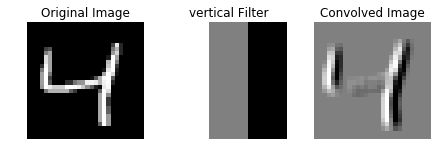

In [0]:
#vertical filter
plt.figure(figsize=(15, 15))
kV = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]
plt.subplot(6,6,1)
plt.imshow(img4,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Original Image')
plt.subplot(6,6,2)
plt.imshow(kV,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('vertical Filter')
convolved_img = convolve2d(img4, kV, mode='same')
plt.subplot(6,6,3)
plt.imshow(convolved_img,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Convolved Image')

Text(0.5, 1.0, 'Convolved Image')

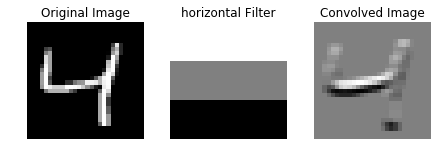

In [0]:
#horizontal filter
plt.figure(figsize=(15, 15))
kH = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]
plt.subplot(6,6,1)
plt.imshow(img4,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Original Image')
plt.subplot(6,6,2)
plt.imshow(kH,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('horizontal Filter')
convolved_img = convolve2d(img4, kH, mode='same')
plt.subplot(6,6,3)
plt.imshow(convolved_img,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Convolved Image')

Text(0.5, 1.0, 'Convolved Image')

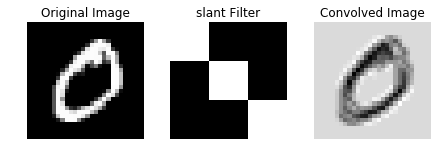

In [0]:
#slant filter
plt.figure(figsize=(15, 15))
kS = [[1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]]
plt.subplot(6,6,1)
plt.imshow(img0,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Original Image')
plt.subplot(6,6,2)
plt.imshow(kS,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('slant Filter')
convolved_img = convolve2d(img0, kS, mode='same')
plt.subplot(6,6,3)
plt.imshow(convolved_img,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Convolved Image')

Text(0.5, 1.0, 'Convolved Image')

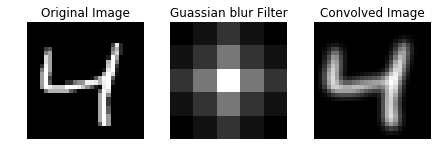

In [0]:
#Guassian blur discretized
#slant filter
#kG = [[1/16, 2/16, 1/16],
#    [2/16, 4/16, 2/16],
#    [1/16, 2/16, 1/16]]
plt.figure(figsize=(15, 15))
kG1 = np.array([1,2,4,2,1])
kG2 = kG1.reshape(-1,1)
plt.subplot(6,6,1)
plt.imshow(img4,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Original Image')
plt.subplot(6,6,2)
plt.imshow(np.divide(np.multiply(np.array(kG1),kG2),16),cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Guassian blur Filter')
convolved_img = convolve2d(img4, np.divide(np.multiply(np.array(kG1),kG2),16), mode='same')
plt.subplot(6,6,3)
plt.imshow(convolved_img,cmap='gray',interpolation='none'); plt.axis('off');
plt.title('Convolved Image')

3. [3 marks] Data Augmentation [~0.5 hr]<br/>
a. [1 mark] Mention any 2 types of Data Augmentation that would be suitable for:<br/>
    - MNIST images<br/>
    - Dog vs Cat images<br/>
 
 <b>Answer:</b> For MNIST dataset <b>rotation and zooming</b> image augmentation would be helpful.<br/>
  For Dog vs cat images <b>horizontal flip and zooming</b> image augmentations would be helpful.<br/>

 b. [2 marks] Implement any one of them. Note that you only need to show the results for at most 5 examples. (I.e. do not run your augmentation on the entire data set; that would take too long!)<br/>

In [0]:
sample_df = train_df.sample(n=5,random_state=20).reset_index(drop=True)
sample_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

sample_generator = sample_datagen.flow_from_dataframe(
    sample_df, "./train/", x_col='filename', y_col='target',
    target_size=(128,128), class_mode='binary',batch_size=5,seed=1)

Found 5 images belonging to 2 classes.


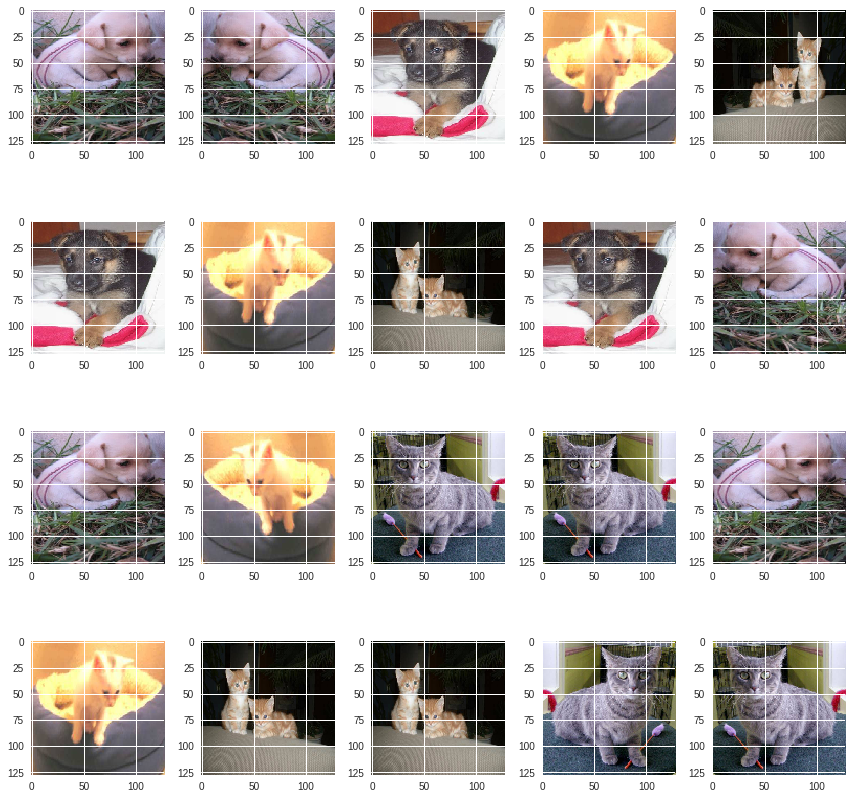

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 20):
    plt.subplot(4, 5, i+1)
    for X_batch, Y_batch in sample_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

4. [10 marks] In this subsection, you will construct a custom CNN classifier in Keras for the Dog vs Cat classification task. In order to reduce computation time, you might want to subsample the images to a smaller size and train the CNN. Note that not doing so might lead to intractable computational requirements. [~0.5 hr to construct, ~2 hrs to experiment and summarize (ignoring running time)]<br/>
a. [2 * 3 marks] Explore how the following affect the performance: <br/>
  - Activation function. <br/>
  - Weights initialization. <br/>
  - The number of layers of the Neural Network. <br/>
 
 b. [2 marks] Which optimizer(s) did try? Compare the convergence rates. <br/>
c. [2 marks] Summarize your findings and what you learned.<br/>

<b>Answers:</b><br/>
<b>Note: Below cells contain the code and graphs for evaluating the performance by changing activation function/layers/optimizers.</b></br>
a. Performance by using different:
- Activation Functions:   Relu activation function performs better in comparison to sigmoid. Sigmoid is not able to converge loss and accuracy remains fluctuating around 50%.
- Weights Initialization: It was observed that if we initialize the weights the model predict wells and it learns fast. Also while testing if the model is created with random weights in less layers in didn't always converged but if weights were initialized it started with good accuracy and started reducing loss(not significantly in case of less layers).
- Number of Layers of the Neural Network : Number of layers in neural model plays a crucial part as the way we design the model the features are learned based on that. A model with less layers was created and test it didn't tend to perform well. On the contrary when more Dense layers were added it gave better results.

b. Performance using Different Optimizers(Adam,SGD,RMSProp):</br>
  Overall, it seems Adam optimizer generalizes well with high accuracy thou there wasn't  much performance difference between the SGD and Adam optimizers both achieved good accuracy and generalized well on valid set till epoch 17 as we look at the loss and accuracy graph. But there was a lot of fluctuation in valid loss in case of RMSProp where as for SGD and Adam the graphs were smooth for train and vaid.

c. Summary:
There are lot of factors that impact the final performance of the model:
- Image Preprocessing: how we pre-process the images, Normalize it set the dimensions and apply padding if necessary.
- Data Augmentation: It is necessary to apply valid data augmentation based on the dataset for an instance if there is a contrast difference or say if in the images the object  is at a certain angle and tilting or rotating it by certain amount might help the model to predict better.
- Creating Model with proper activation function and number of layers and how the features are increased or decreased from one layer to another.
- Initializing the weights is an important factor for starting of from a minimum loss and possibility to converge. As sometimes random assignment don't tend to work well.
- Compile the model based on optimizer.
- fine tune the model by empirically testing the above steps.
- Set a callback method to avoid overfitting of the model. As if the model is train for longer epochs the train loss will decrease but it might not generalize well on valid and test set.
- For the transfer learning if the original weights are freezed it's hard that the model will learn or generalize well on the other dataset.


In [0]:
batch_size = 32
#split the dataframe into train,valid and test
train_df_1 = train_df[:15000]
train_df,valid_df = train_test_split(train_df_1, random_state=10, shuffle=True, test_size=0.2, stratify =train_df_1['target'] )

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(train_df, "./train/", x_col='filename', y_col='target',target_size=(128,128), class_mode='binary',batch_size=batch_size)
valid_generator  = test_datagen.flow_from_dataframe(valid_df, "./train/", x_col='filename', y_col='target',target_size=(128,128), class_mode='binary',batch_size=batch_size)
#test_generator  = test_datagen.flow_from_dataframe(test_df, "./train/", x_col='filename', y_col='target',target_size=(128,128), class_mode='binary',batch_size=batch_size)

Found 12000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [0]:
def model_lesslayers():
    model_ll = Sequential()
    model_ll.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model_ll.add(Conv2D(64, (3, 3), activation='relu'))
    model_ll.add(MaxPooling2D(pool_size=(2,2)))
    model_ll.add(Conv2D(128, (3, 3), activation='relu'))
    model_ll.add(MaxPooling2D(pool_size=(2,2)))
    model_ll.add(Flatten())
    model_ll.add(Dropout(0.5))
    model_ll.add(Dense(265, activation='relu'))
    model_ll.add(Dense(1, activation='sigmoid'))
    return model_ll
  
def model_activation():
    model_ac = Sequential()
    model_ac.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(128, 128, 3)))
    model_ac.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model_ac.add(MaxPooling2D(pool_size=(2, 2)))
    model_ac.add(Conv2D(64, (3, 3), activation='sigmoid'))
    model_ac.add(MaxPooling2D(pool_size=(2,2)))
    model_ac.add(Conv2D(128, (3, 3), activation='sigmoid'))
    model_ac.add(MaxPooling2D(pool_size=(2,2)))
    model_ac.add(Conv2D(128, (3, 3), activation='sigmoid'))
    model_ac.add(MaxPooling2D(pool_size=(2,2)))
    model_ac.add(Conv2D(256, (3, 3), activation='sigmoid'))
    model_ac.add(MaxPooling2D(pool_size=(2,2)))
    model_ac.add(Flatten())
    model_ac.add(Dropout(0.5))
    model_ac.add(Dense(512, activation='relu'))
    model_ac.add(Dense(1, activation='sigmoid'))
    return model_ac

# Reference: https://www.kaggle.com/keogh24/dogs-v-cats-keras
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model 

In [0]:
#Model with less number of layers
epochs=10
model_less = model_lesslayers()
rmspropless = optimizers.RMSprop(lr=1e-3)
model_less.compile(loss='binary_crossentropy',optimizer=rmspropless, metrics=['accuracy'])
historyRMSless = model_less.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)


Epoch 1/10
375/375 [==============================] - 82s 218ms/step - loss: 7.8292 - acc: 0.5072 - val_loss: 7.8101 - val_acc: 0.5101
Epoch 2/10
375/375 [==============================] - 70s 186ms/step - loss: 7.8397 - acc: 0.5082 - val_loss: 7.9819 - val_acc: 0.4993
Epoch 3/10
375/375 [==============================] - 69s 184ms/step - loss: 7.9964 - acc: 0.4984 - val_loss: 7.8369 - val_acc: 0.5084
Epoch 4/10
375/375 [==============================] - 69s 183ms/step - loss: 7.8862 - acc: 0.5053 - val_loss: 7.8530 - val_acc: 0.5074
Epoch 5/10
375/375 [==============================] - 68s 182ms/step - loss: 7.9008 - acc: 0.5044 - val_loss: 8.0142 - val_acc: 0.4973
Epoch 6/10
375/375 [==============================] - 68s 182ms/step - loss: 7.8011 - acc: 0.5107 - val_loss: 7.8154 - val_acc: 0.5098
Epoch 7/10
375/375 [==============================] - 69s 183ms/step - loss: 7.8437 - acc: 0.5080 - val_loss: 7.7832 - val_acc: 0.5118
Epoch 8/10
375/375 [==============================] - 6

In [0]:
#Model by initializing weights
epochs=15
model_weights = model_lesslayers()
rmspropless = optimizers.RMSprop(lr=1e-2)
model_weights.load_weights('my_model_weights.h5')
model_weights.compile(loss='binary_crossentropy',optimizer=rmspropless, metrics=['accuracy'])
historyWeights = model_weights.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)


Epoch 1/20
375/375 [==============================] - 83s 221ms/step - loss: 0.4067 - acc: 0.8213 - val_loss: 0.4897 - val_acc: 0.7867
Epoch 2/20
375/375 [==============================] - 71s 190ms/step - loss: 0.4004 - acc: 0.8267 - val_loss: 0.4203 - val_acc: 0.8224
Epoch 3/20
375/375 [==============================] - 71s 189ms/step - loss: 0.3807 - acc: 0.8396 - val_loss: 0.4688 - val_acc: 0.7938
Epoch 4/20
375/375 [==============================] - 72s 192ms/step - loss: 0.3864 - acc: 0.8325 - val_loss: 0.3853 - val_acc: 0.8309
Epoch 5/20
375/375 [==============================] - 70s 186ms/step - loss: 0.3656 - acc: 0.8454 - val_loss: 0.4212 - val_acc: 0.8211
Epoch 6/20
375/375 [==============================] - 69s 185ms/step - loss: 0.3532 - acc: 0.8542 - val_loss: 0.4045 - val_acc: 0.8177
Epoch 7/20
375/375 [==============================] - 70s 185ms/step - loss: 0.3462 - acc: 0.8536 - val_loss: 0.4272 - val_acc: 0.8359
Epoch 8/20
375/375 [==============================] - 7

In [0]:
#Model with sigmoid activation
model_act = model_activation()
epochs = 10
rmspropact = optimizers.RMSprop(lr=1e-3)
model_act.compile(loss='binary_crossentropy',optimizer=rmspropact, metrics=['accuracy'])
historyRMSSigmoid = model_act.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)


Epoch 1/10
375/375 [==============================] - 74s 197ms/step - loss: 0.7256 - acc: 0.5008 - val_loss: 0.6930 - val_acc: 0.5081
Epoch 2/10
375/375 [==============================] - 62s 165ms/step - loss: 0.6969 - acc: 0.5032 - val_loss: 0.6934 - val_acc: 0.5051
Epoch 3/10
375/375 [==============================] - 60s 160ms/step - loss: 0.6956 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4983
Epoch 4/10
375/375 [==============================] - 60s 161ms/step - loss: 0.6949 - acc: 0.4986 - val_loss: 0.6932 - val_acc: 0.4923
Epoch 5/10
375/375 [==============================] - 60s 160ms/step - loss: 0.6948 - acc: 0.4953 - val_loss: 0.6932 - val_acc: 0.5064
Epoch 6/10
375/375 [==============================] - 61s 162ms/step - loss: 0.6947 - acc: 0.4967 - val_loss: 0.6945 - val_acc: 0.5054
Epoch 7/10
375/375 [==============================] - 61s 163ms/step - loss: 0.6942 - acc: 0.4988 - val_loss: 0.6931 - val_acc: 0.5064
Epoch 8/10
375/375 [==============================] - 6

In [0]:
#model with RMSProp optimizer
modelrms = create_model()
epochs = 30
rmsprop = optimizers.RMSprop(lr=1e-3)
modelrms.compile(loss='binary_crossentropy',optimizer=rmsprop, metrics=['accuracy'])
historyRMS = modelrms.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)


Epoch 1/30
375/375 [==============================] - 66s 177ms/step - loss: 0.6819 - acc: 0.5687 - val_loss: 0.6174 - val_acc: 0.6823
Epoch 2/30
375/375 [==============================] - 62s 166ms/step - loss: 0.6130 - acc: 0.6748 - val_loss: 0.5267 - val_acc: 0.7416
Epoch 3/30
375/375 [==============================] - 63s 167ms/step - loss: 0.5405 - acc: 0.7324 - val_loss: 0.5079 - val_acc: 0.7466
Epoch 4/30
375/375 [==============================] - 63s 169ms/step - loss: 0.4870 - acc: 0.7705 - val_loss: 0.4415 - val_acc: 0.8026
Epoch 5/30
375/375 [==============================] - 63s 169ms/step - loss: 0.4304 - acc: 0.8038 - val_loss: 0.3668 - val_acc: 0.8450
Epoch 6/30
375/375 [==============================] - 64s 171ms/step - loss: 0.3829 - acc: 0.8293 - val_loss: 0.4551 - val_acc: 0.8042
Epoch 7/30
375/375 [==============================] - 62s 166ms/step - loss: 0.3343 - acc: 0.8573 - val_loss: 0.3391 - val_acc: 0.8534
Epoch 8/30
375/375 [==============================] - 6

In [0]:
#Model with SGD Optimizer
modelsgd = create_model()
epochs = 30
sgd = optimizers.SGD(lr = 1e-2, decay = 1e-6, momentum = 0.9, nesterov = True)
modelsgd.compile(loss='binary_crossentropy',optimizer = sgd, metrics=['accuracy'])

historySGD  = modelsgd.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)


Epoch 1/30
375/375 [==============================] - 73s 195ms/step - loss: 0.6347 - acc: 0.6400 - val_loss: 0.6015 - val_acc: 0.6742
Epoch 2/30
375/375 [==============================] - 64s 171ms/step - loss: 0.5848 - acc: 0.6908 - val_loss: 0.5549 - val_acc: 0.7170
Epoch 3/30
375/375 [==============================] - 65s 172ms/step - loss: 0.5226 - acc: 0.7381 - val_loss: 0.4619 - val_acc: 0.7871
Epoch 4/30
375/375 [==============================] - 66s 177ms/step - loss: 0.4663 - acc: 0.7761 - val_loss: 0.4198 - val_acc: 0.8120
Epoch 5/30
375/375 [==============================] - 63s 169ms/step - loss: 0.4151 - acc: 0.8080 - val_loss: 0.3825 - val_acc: 0.8299
Epoch 6/30
375/375 [==============================] - 63s 169ms/step - loss: 0.3762 - acc: 0.8327 - val_loss: 0.4144 - val_acc: 0.8167
Epoch 7/30
375/375 [==============================] - 64s 170ms/step - loss: 0.3214 - acc: 0.8582 - val_loss: 0.3458 - val_acc: 0.8521
Epoch 8/30
375/375 [==============================] - 6

In [0]:
#Model with ADAM Optimizer
modeladam = create_model()
epochs = 30
adam = optimizers.Adam(lr=1e-3, epsilon=None, amsgrad=False)
modeladam.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
historyADAM = modeladam.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)

Epoch 1/30
375/375 [==============================] - 75s 200ms/step - loss: 0.6630 - acc: 0.5902 - val_loss: 0.6705 - val_acc: 0.5879
Epoch 2/30
375/375 [==============================] - 62s 166ms/step - loss: 0.5894 - acc: 0.6804 - val_loss: 0.6090 - val_acc: 0.6735
Epoch 3/30
375/375 [==============================] - 63s 167ms/step - loss: 0.5265 - acc: 0.7352 - val_loss: 0.5158 - val_acc: 0.7389
Epoch 4/30
375/375 [==============================] - 63s 169ms/step - loss: 0.4575 - acc: 0.7812 - val_loss: 0.4058 - val_acc: 0.8177
Epoch 5/30
375/375 [==============================] - 63s 169ms/step - loss: 0.3861 - acc: 0.8230 - val_loss: 0.3601 - val_acc: 0.8369
Epoch 6/30
375/375 [==============================] - 64s 170ms/step - loss: 0.3387 - acc: 0.8503 - val_loss: 0.3706 - val_acc: 0.8393
Epoch 7/30
375/375 [==============================] - 63s 167ms/step - loss: 0.2988 - acc: 0.8662 - val_loss: 0.3138 - val_acc: 0.8571
Epoch 8/30
375/375 [==============================] - 6

In [0]:
#Reference: from https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
def plot_history(history,title):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss for: '+title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy for: '+title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



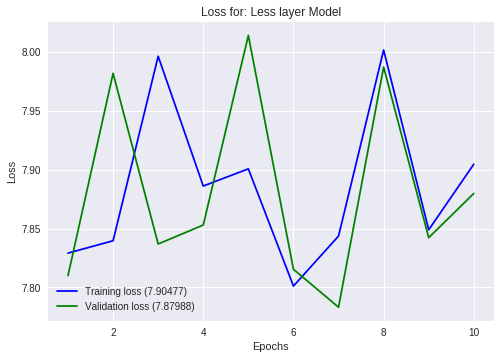

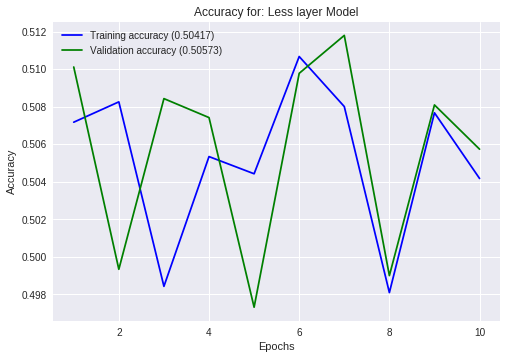

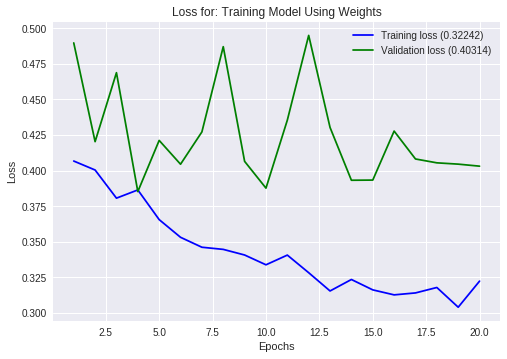

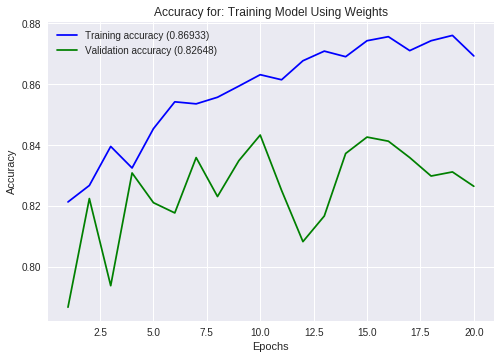

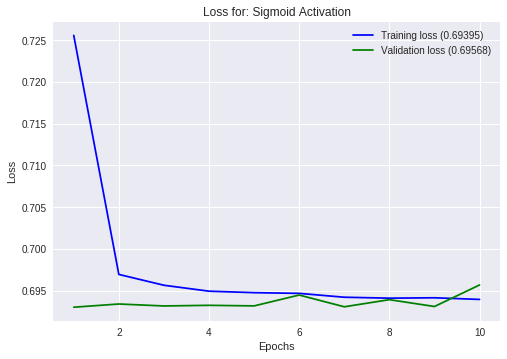

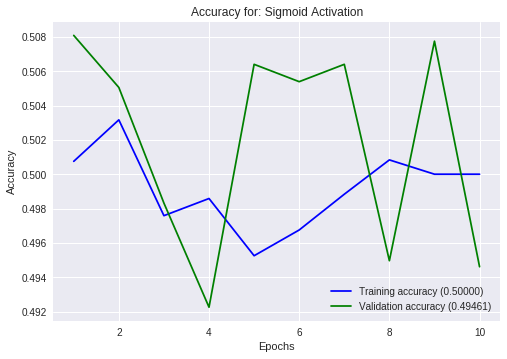

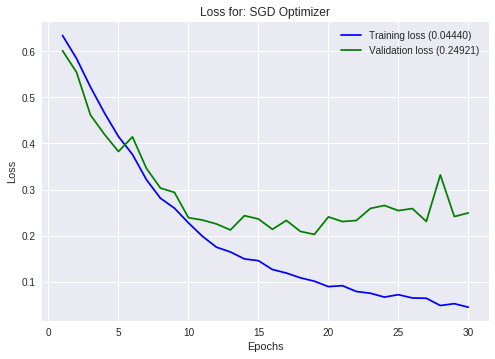

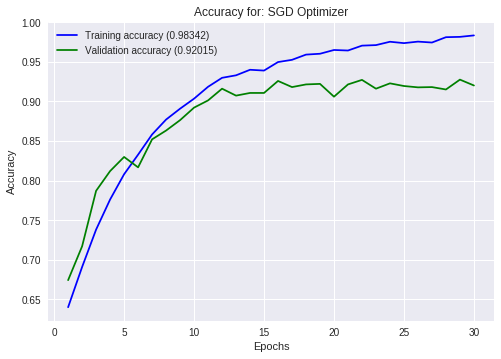

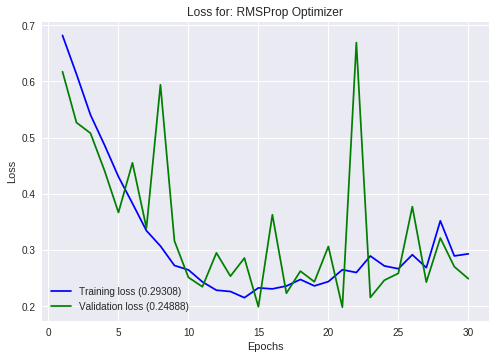

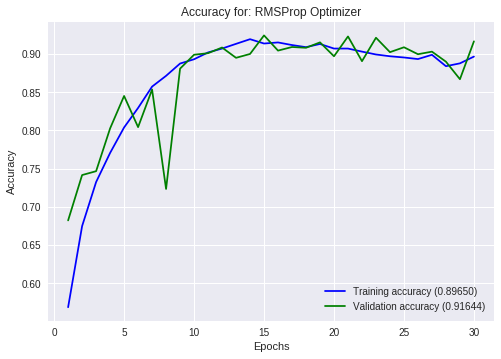

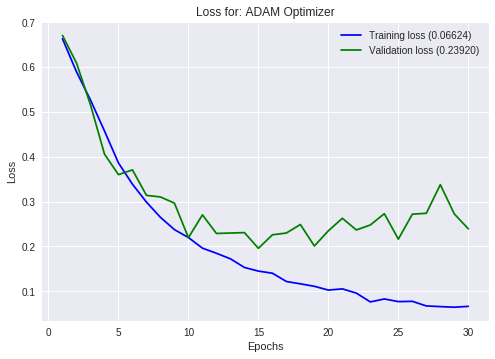

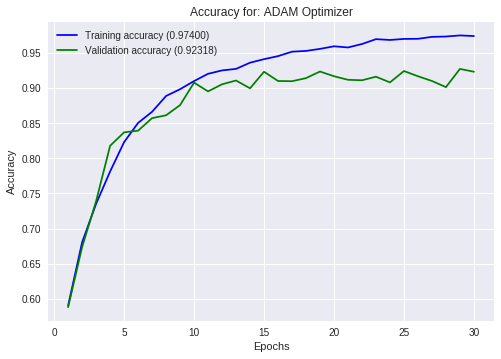

In [0]:
plot_history(historyRMSless,'Less layer Model')
plot_history(historyWeights,'Training Model Using Weights')
plot_history(historyRMSSigmoid,'Sigmoid Activation')
plot_history(historySGD,'SGD Optimizer')
plot_history(historyRMS,'RMSProp Optimizer')
plot_history(historyADAM,'ADAM Optimizer')

5. 
[10 marks] Transfer Learning: Instead of training the machine from scratch, we can usually make use of pre-trained models. In this setting, a certain number of lower level layers are borrowed from the pre-trained model and connected to a new set of trainable layers which ultimately predict the class. Keras offers a bunch of pre-trained classifiers and the documentation for using them is mentioned here - https://keras.io/applications/. Choose 1 of them and graft additional layers and train only the additional layers. [~2 hrs]

In [0]:
res_model = ResNet50(include_top = False,weights='imagenet')
# Freeze the existing layers
res_model.trainable = False
from keras.applications import vgg16
vgg_model = vgg16.VGG16(include_top = False,weights='imagenet')
vgg_model.trainable = False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
added_model= Sequential()
added_model.add(vgg_model)
added_model.add(GlobalAveragePooling2D())
added_model.add(Dense(512,activation='relu'))
added_model.add(Dense(1024,activation='relu'))
added_model.add(Dense(2048,activation='relu'))
added_model.add(Dropout(0.5))
added_model.add(Dense(512,activation='relu'))
added_model.add(Dense(1,activation='softmax'))
added_model.layers[0].trainable = False
added_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_13  (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_62 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_63 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dropout_21 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 512)               1049088   
__________

In [0]:
epochs=20
adam = optimizers.Adam(lr=1e-3, epsilon=None, amsgrad=False)
added_model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
historyCustom = added_model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size
)

Epoch 1/10
375/375 [==============================] - 85s 227ms/step - loss: 7.9008 - acc: 0.5044 - val_loss: 7.8799 - val_acc: 0.5057
Epoch 2/10
375/375 [==============================] - 69s 183ms/step - loss: 7.8596 - acc: 0.5070 - val_loss: 7.8799 - val_acc: 0.5057
Epoch 3/10
375/375 [==============================] - 68s 182ms/step - loss: 7.8423 - acc: 0.5081 - val_loss: 7.8691 - val_acc: 0.5064
Epoch 4/10
375/375 [==============================] - 68s 181ms/step - loss: 7.9433 - acc: 0.5017 - val_loss: 7.9605 - val_acc: 0.5007
Epoch 5/10
375/375 [==============================] - 68s 181ms/step - loss: 7.8131 - acc: 0.5099 - val_loss: 7.8208 - val_acc: 0.5094
Epoch 6/10
375/375 [==============================] - 68s 180ms/step - loss: 7.8941 - acc: 0.5048 - val_loss: 7.7725 - val_acc: 0.5125
Epoch 7/10
375/375 [==============================] - 68s 181ms/step - loss: 7.8702 - acc: 0.5063 - val_loss: 7.9980 - val_acc: 0.4983
Epoch 8/10
375/375 [==============================] - 6